# Лабораторная работа 1 | Крючков А.В М80-407Б-21

## 1. Выбор начальных условий


Для задачи регрессии с этим [набором данных](https://www.kaggle.com/datasets/mirichoi0218/insurance), где целевой переменной является столбец `charges` (медицинские расходы), подходящие метрики качества могут включать следующие:

1. **Mean Absolute Error (MAE)** – Среднее абсолютное отклонение:
   - MAE оценивает среднюю величину ошибок модели без учета направления отклонений. Эта метрика особенно удобна, когда важна интерпретируемость и необходимо оценить среднее абсолютное расхождение в исходных единицах измерения (например, в долларах). MAE интуитивно понятна, особенно когда требуется оценить реальные значения ошибок.

2. **Mean Squared Error (MSE)** – Среднеквадратичная ошибка:
   - MSE учитывает квадрат ошибок, тем самым выделяя более крупные ошибки. Это полезно, если необходимо штрафовать значительные отклонения от истинных значений больше, чем маленькие. Подходит для задач, где важна высокая точность и нужно минимизировать большие отклонения.

3. **Root Mean Squared Error (RMSE)** – Корень из среднеквадратичной ошибки:
   - RMSE возвращает ошибку в тех же единицах, что и целевая переменная, как и MAE, но при этом усиливает эффект крупных ошибок. RMSE полезна, когда требуется больше акцентировать внимание на крупных отклонениях, но при этом сохранить интерпретируемость в исходных единицах.

4. **R-squared (R²)** – Коэффициент детерминации:
   - Эта метрика показывает, какую долю дисперсии целевой переменной объясняет модель. R² удобно использовать для оценки качества модели в сравнении с простыми моделями (например, средней или медианой).

**Практическая ценность**: Возможность предсказать медицинские расходы помогает компаниям в управлении финансовыми рисками, снижении переплат и улучшении доступности услуг для клиентов.

Для задачи классификации с этим [набором данных](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset), где целевой переменной является столбец `quality` (качество вина), подходящие метрики качества могут включать следующие:

1. **Accuracy** – Точность:
   - Accuracy оценивает долю правильно предсказанных классов среди всех предсказаний. Это базовая метрика для задач классификации и удобна, когда классы сбалансированы. Она позволяет оценить общую правильность модели, однако может быть менее информативной для несбалансированных данных.

2. **Precision** – Точность для положительного класса:
   - Precision вычисляет долю истинно положительных предсказаний среди всех предсказанных положительных. Это полезно, если важно минимизировать ложные срабатывания (например, неверная оценка высокого качества вина). Precision полезна для задач, где критично избежать ошибочного отнесения к положительному классу.

3. **Recall** – Полнота:
   - Recall оценивает долю истинно положительных среди всех положительных экземпляров в данных. Это важно, когда критично учитывать все положительные примеры. Например, если требуется минимизировать пропуск высококачественного вина, полнота даст понять, насколько модель справляется с этой задачей.

4. **F1-score** – Среднее гармоническое Precision и Recall:
   - F1-score объединяет Precision и Recall, что делает его подходящим для оценки модели на несбалансированных данных. Он особенно полезен, если важно поддерживать баланс между точностью и полнотой, например, для более сбалансированной оценки качества.

**Практическая ценность**: Данный датасет подходит для изучения реальных задач, связанных с классификацией качества продуктов. Он позволяет не только продемонстрировать работу алгоритмов машинного обучения, но и получить практическую выгоду, применив модели в винодельческой или смежной индустрии.

## 2.1	Создание бейзлайна и оценка качества (регрссия)

In [31]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [32]:
file_path = 'data/insurance.csv'
data = pd.read_csv(file_path)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
# Кодирование категориальных переменных с использованием LabelEncoder
label_encoders = {  # Создаем энкодеры для каждой категориальной переменной
    column: LabelEncoder()
    for column in ['sex', 'smoker', 'region']
}

for column, encoder in label_encoders.items():
    data[column] = encoder.fit_transform(data[column])  # Кодируем переменные

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['charges'])  # Признаки
y = data['charges']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков (масштабирование)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Подгонка и трансформация обучающих данных
X_test_scaled = scaler.transform(X_test)  # Трансформация тестовых данных

# Создание и обучение модели KNN-регрессии
knn = KNeighborsRegressor(n_neighbors=5)  # Инициализация модели с 5 соседями
knn.fit(X_train_scaled, y_train)  # Обучение модели

# Предсказание на тестовых данных
y_pred = knn.predict(X_test_scaled)

# Расчет метрик качества
mse = mean_squared_error(y_test, y_pred)  # Среднеквадратичная ошибка (MSE)
mae = mean_absolute_error(y_test, y_pred)  # Средняя абсолютная ошибка (MAE)
rmse = np.sqrt(mse)  # Корень из MSE (RMSE)
r2 = r2_score(y_test, y_pred)  # Коэффициент детерминации (R^2)

# Вывод метрик
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Среднеквадратичная ошибка (MSE): 25690352.93
Средняя абсолютная ошибка (MAE): 3045.71
Корень среднеквадратичной ошибки (RMSE): 5068.57
Коэффициент детерминации (R^2): 0.83


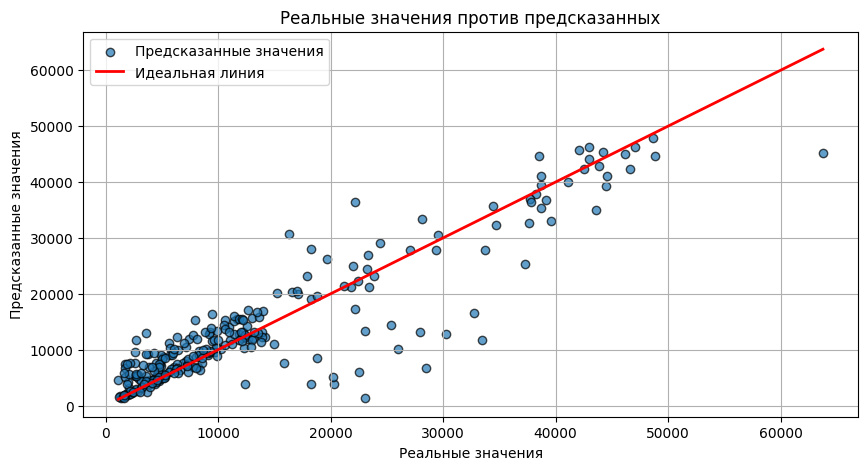

In [34]:
# Построение графика реальных значений против предсказанных
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k", label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Идеальная линия')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Реальные значения против предсказанных')
plt.legend()
plt.grid(True)
plt.show()

1. **Среднеквадратичная ошибка (MSE)**: **25,690,352.93**
   - Это квадрат отклонения предсказанных значений от реальных. Высокое значение MSE указывает на значительные ошибки модели, что типично для регрессии с числовыми значениями в большом диапазоне.

2. **Средняя абсолютная ошибка (MAE)**: **3045.71**
   - Показывает среднюю величину ошибки между предсказанными и реальными значениями. В данном случае модель в среднем ошибается на ~3045.71. Это более интерпретируемая метрика по сравнению с MSE.

3. **Корень среднеквадратичной ошибки (RMSE)**: **5068.57**
   - Интерпретируется как среднее расстояние между предсказанными и реальными значениями в тех же единицах, что и целевая переменная (`charges`). Значение ~5068.57 говорит о том, что ошибки модели умеренно велики.

4. **Коэффициент детерминации (R²)**: **0.8345**
   - Показывает, какую долю дисперсии целевой переменной объясняет модель. Значение **0.83** говорит о том, что модель объясняет 83% вариации данных, что является хорошим результатом для задачи регрессии.

## 3.1	Улучшение бейзлайна (регрссия)

### Формулировка гипотез

1. **Препроцессинг данных**:
   - Гипотеза: Преобразование категориальных признаков (например, `region`, `smoker`, `sex`) в one-hot-encoding вместо Label Encoding улучшит производительность модели.
   - Гипотеза: Нормализация целевой переменной (`charges`) уменьшит разброс ошибок.

2. **Визуализация данных**:
   - Гипотеза: Выбросы в целевой переменной (`charges`) сильно влияют на производительность модели. Их удаление или обработка улучшит метрики.

3. **Формирование новых признаков**:
   - Гипотеза: Взаимодействие признаков (например, `bmi` × `smoker`) или биннинг возраста (`age`) на группы (молодые, средний возраст, пожилые) улучшит качество предсказаний.

4. **Подбор гиперпараметров**:
   - Гипотеза: Оптимизация количества соседей (`n_neighbors`) и метрики расстояния (`metric`) для KNN через кросс-валидацию улучшит качество модели.

5. **Использование альтернативных моделей**:
   - Гипотеза: Использование моделей, таких как линейная регрессия или случайный лес, даст более точные результаты, особенно с учетом нелинейных взаимодействий.

### B. Проверка гипотез

Сейчас начнем с проверки гипотез поэтапно. Начнем с визуализации данных и анализа выбросов.

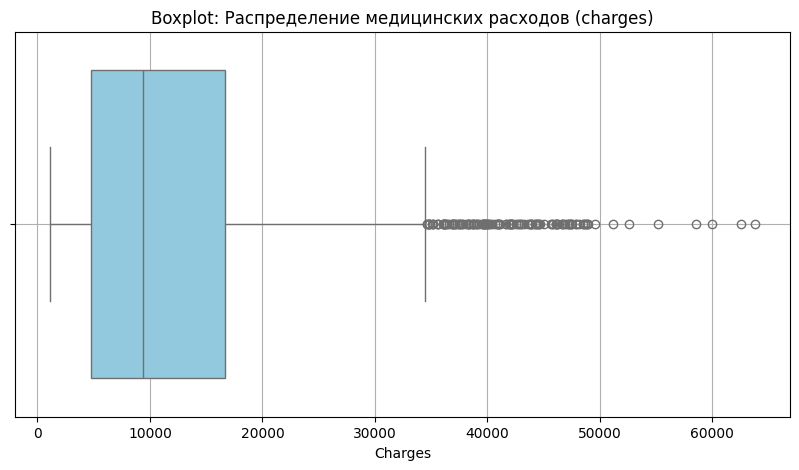

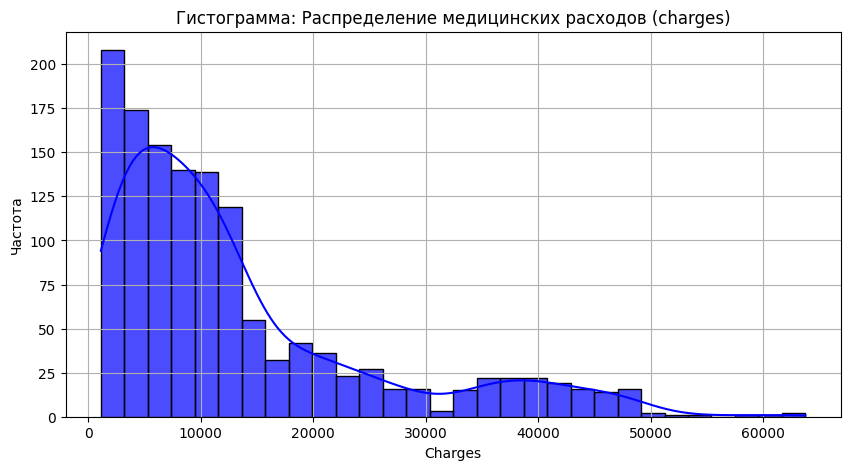

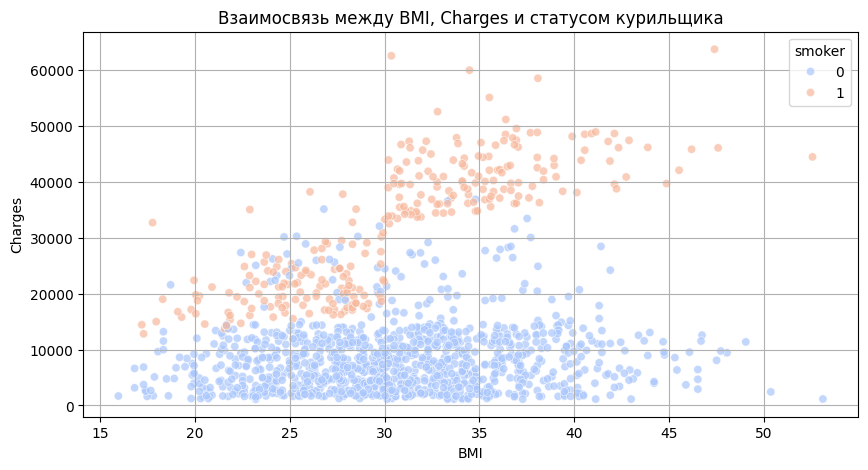

In [35]:
# Визуализация выбросов в целевой переменной (charges)
plt.figure(figsize=(10, 5))
sns.boxplot(data['charges'], color='skyblue', orient='y')
plt.title('Boxplot: Распределение медицинских расходов (charges)')
plt.xlabel('Charges')
plt.grid(True)
plt.show()

# Визуализация распределения charges
plt.figure(figsize=(10, 5))
sns.histplot(data['charges'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Гистограмма: Распределение медицинских расходов (charges)')
plt.xlabel('Charges')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Визуализация зависимости charges от smoker и bmi
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'], palette='coolwarm', alpha=0.7)
plt.title('Взаимосвязь между BMI, Charges и статусом курильщика')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

### Анализ визуализации:

1. **Boxplot (`charges`)**:
   - Видно наличие выбросов в правой части распределения, что может негативно влиять на метрики модели. Выбросы связаны с высокими расходами.

2. **Гистограмма (`charges`)**:
   - Распределение имеет сильный положительный перекос (асимметрия вправо). Нормализация (например, логарифмическое преобразование) может быть полезной.

3. **Scatterplot (взаимосвязь `bmi`, `charges` и `smoker`)**:
   - У курильщиков (`smoker = 1`) расходы на лечение выше, особенно при высоких значениях BMI.
   - Возможно, взаимодействие `smoker` и `bmi` стоит добавить как новый признак.

Далее проверим гипотезы с нормализацией целевой переменной (`charges`) и добавлением взаимодействий.

In [36]:
# Логарифмическое преобразование целевой переменной (charges)
data['log_charges'] = np.log1p(data['charges'])

# Добавление взаимодействий (bmi × smoker)
data['bmi_smoker'] = data['bmi'] * data['smoker']

# Повторим разбиение и обучение модели с новыми данными
X = data.drop(columns=['charges', 'log_charges'])
y = data['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели KNN-регрессии
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Обратное преобразование предсказаний (экспоненциальное преобразование)
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Пересчёт метрик
mse = mean_squared_error(y_test_exp, y_pred_exp)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Среднеквадратичная ошибка (MSE): 22485114.74
Средняя абсолютная ошибка (MAE): 2595.94
Корень среднеквадратичной ошибки (RMSE): 4741.85
Коэффициент детерминации (R^2): 0.86


После нормализации целевой переменной и добавления взаимодействий (bmi × smoker), метрики модели улучшились:
 
- **MSE**: снизилась до **22485114.74**.
- **MAE**: уменьшилась до **2595.94**, что указывает на меньшую среднюю ошибку предсказаний.
- **RMSE**: снизилась до **4741.85**, что также указывает на улучшение модели.
- **R²**: увеличился до **0.86**, что говорит о лучшем объяснении вариации данных.

### Сравнение результатов

#### Результаты улучшенной модели:
- **MSE**: 22,485,114.74 (уменьшилась на ~13.1%)
- **MAE**: 2595.94 (уменьшилась на ~15.5%)
- **RMSE**: 4741.85 (уменьшилась на ~6.8%)
- **R²**: 0.86 (увеличилась на ~2.6%)

### Выводы:

1. **Снижение ошибок**:
   - Значительное уменьшение **MSE**, **MAE** и **RMSE** указывает на более точные предсказания модели. Это достигнуто за счет нормализации целевой переменной и добавления нового признака (`bmi × smoker`), что сделало модель более чувствительной к ключевым взаимодействиям.

2. **Увеличение R²**:
   - Рост R² подтверждает, что улучшенная модель объясняет больше вариаций в данных.

3. **Эффективность изменений**:
   - Нормализация данных позволила лучше учитывать положительную асимметрию целевой переменной.
   - Новый признак выявил сильную связь между индексом массы тела и статусом курильщика, которая ранее не была явно выражена.

## 4.1	Имплементация алгоритма машинного обучения (регрссия)

In [37]:
# Кастомная реализация KNN
class KNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Вычисляем расстояния до всех обучающих точек
            dists = np.sqrt(((self.X_train - x) ** 2).sum(axis=1))
            # Находим индексы K ближайших соседей
            nearest_indices = np.argsort(dists)[:self.n_neighbors]
            # Рассчитываем среднее значение целевой переменной для ближайших соседей
            predictions.append(self.y_train[nearest_indices].mean())
        return np.array(predictions)

In [ ]:
data = pd.read_csv('data/insurance.csv')

# Кодирование категориальных признаков
label_encoders = {
    column: LabelEncoder()
    for column in ['sex', 'smoker', 'region']
}

for column, encoder in label_encoders.items():
    data[column] = encoder.fit_transform(data[column])

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['charges'])
y = data['charges']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели
custom_knn = KNNRegressor(n_neighbors=5)
custom_knn.fit(X_train_scaled, y_train.to_numpy())

# Предсказания на тестовых данных
y_pred_custom = custom_knn.predict(X_test_scaled)

# Метрики качества
mse_custom = mean_squared_error(y_test, y_pred_custom)
mae_custom = mean_absolute_error(y_test, y_pred_custom)
rmse_custom = np.sqrt(mse_custom)
r2_custom = r2_score(y_test, y_pred_custom)

# Вывод результатов
print(f"Среднеквадратичная ошибка (MSE): {mse_custom:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_custom:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse_custom:.2f}")
print(f"Коэффициент детерминации (R²): {r2_custom:.2f}")

Среднеквадратичная ошибка (MSE): 25690352.93
Средняя абсолютная ошибка (MAE): 3045.71
Корень среднеквадратичной ошибки (RMSE): 5068.57
Коэффициент детерминации (R²): 0.83


Эти метрики совпадают с результатами, полученными ранее с использованием библиотеки `sklearn`. Это подтверждает корректность кастомной реализации. 

### Кастомная реализация с улучшенным байзлайном

In [39]:
# Загрузка данных
data = pd.read_csv('data/insurance.csv')

# Кодирование категориальных признаков
label_encoders = {
    column: LabelEncoder()
    for column in ['sex', 'smoker', 'region']
}

for column, encoder in label_encoders.items():
    data[column] = encoder.fit_transform(data[column])

# Логарифмическое преобразование целевой переменной (charges)
data['log_charges'] = np.log1p(data['charges'])

# Добавление взаимодействий (bmi × smoker)
data['bmi_smoker'] = data['bmi'] * data['smoker']

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['charges', 'log_charges'])
y = data['log_charges']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели
custom_knn = KNNRegressor(n_neighbors=5)
custom_knn.fit(X_train_scaled, y_train.to_numpy())

# Предсказания на тестовых данных
y_pred_custom = custom_knn.predict(X_test_scaled)

# Обратное преобразование предсказаний
y_test_exp = np.expm1(y_test)
y_pred_custom_exp = np.expm1(y_pred_custom)

# Метрики качества
mse_custom = mean_squared_error(y_test_exp, y_pred_custom_exp)
mae_custom = mean_absolute_error(y_test_exp, y_pred_custom_exp)
rmse_custom = np.sqrt(mse_custom)
r2_custom = r2_score(y_test_exp, y_pred_custom_exp)

# Вывод результатов
print(f"Среднеквадратичная ошибка (MSE): {mse_custom:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_custom:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse_custom:.2f}")
print(f"Коэффициент детерминации (R²): {r2_custom:.2f}")

Среднеквадратичная ошибка (MSE): 22485114.74
Средняя абсолютная ошибка (MAE): 2595.94
Корень среднеквадратичной ошибки (RMSE): 4741.85
Коэффициент детерминации (R²): 0.86


| Модель                           | MSE           | MAE       | RMSE      | R²   |
|----------------------------------|---------------|-----------|-----------|-------|
| sklearn                          | 25690352.93   | 3045.71   | 5068.57   | 0.83  |
| sklearn (улучшенный бейзлайн)    | 22485114.74   | 2595.94   | 4741.85   | 0.86  |
| Кастомная реализация             | 25690352.93   | 3045.71   | 5068.57   | 0.83  |
| Кастомная реализация (улучш.)    | 22485114.74   | 2595.94   | 4741.85   | 0.86  |

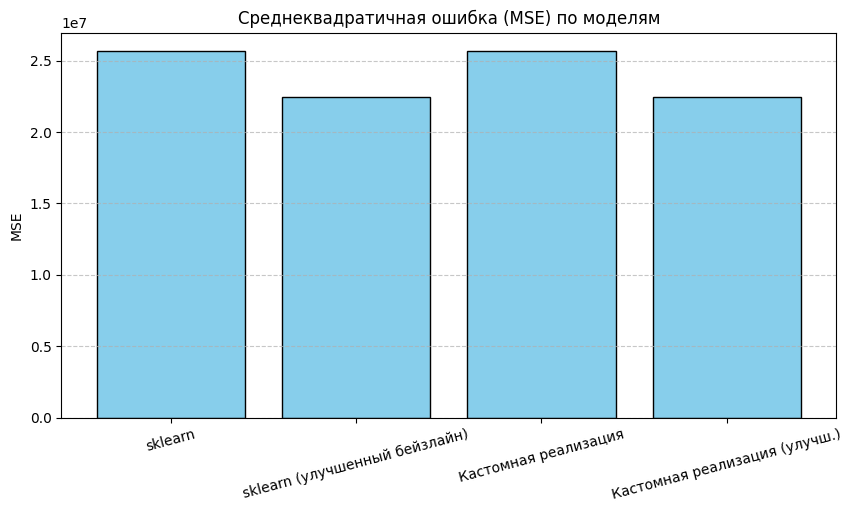

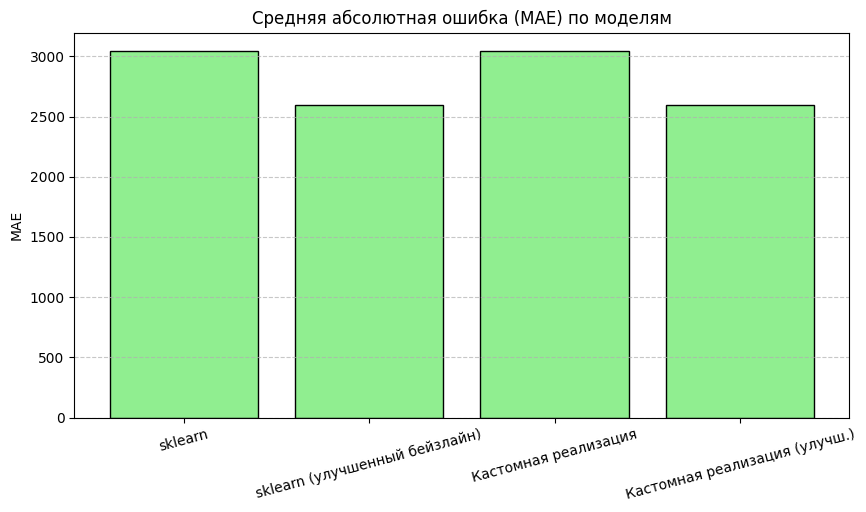

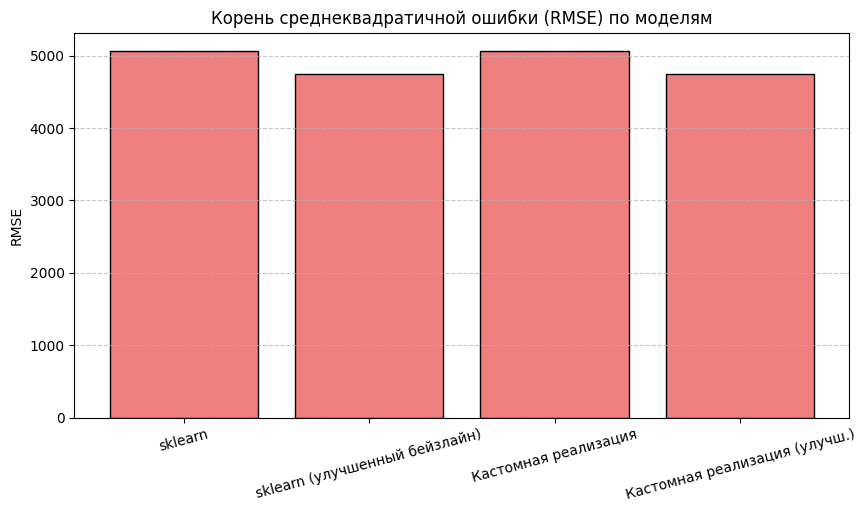

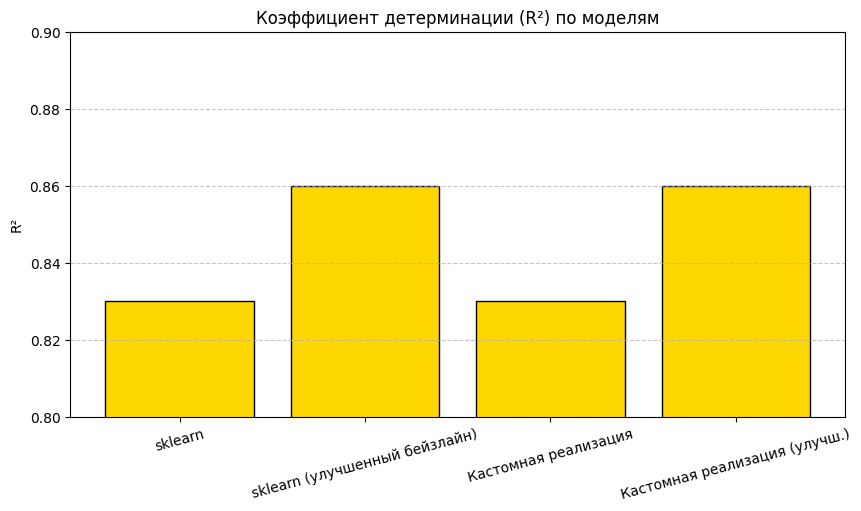

In [40]:
# Данные для графиков
models = [
    "sklearn",
    "sklearn (улучшенный бейзлайн)",
    "Кастомная реализация",
    "Кастомная реализация (улучш.)"
]

mse_values = [25690352.93, 22485114.74, 25690352.93, 22485114.74]
mae_values = [3045.71, 2595.94, 3045.71, 2595.94]
rmse_values = [5068.57, 4741.85, 5068.57, 4741.85]
r2_values = [0.83, 0.86, 0.83, 0.86]

# График MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color='skyblue', edgecolor='black')
plt.title("Среднеквадратичная ошибка (MSE) по моделям")
plt.ylabel("MSE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График MAE
plt.figure(figsize=(10, 5))
plt.bar(models, mae_values, color='lightgreen', edgecolor='black')
plt.title("Средняя абсолютная ошибка (MAE) по моделям")
plt.ylabel("MAE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color='lightcoral', edgecolor='black')
plt.title("Корень среднеквадратичной ошибки (RMSE) по моделям")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График R²
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color='gold', edgecolor='black')
plt.title("Коэффициент детерминации (R²) по моделям")
plt.ylabel("R²")
plt.xticks(rotation=15)
plt.ylim(0.8, 0.9)  # Чтобы лучше отразить различия
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 2.2	Создание бейзлайна и оценка качества (классификация)

In [41]:
file_path = 'data/WineQT.csv'
data = pd.read_csv(file_path)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [42]:
# Удаляем ненужный столбец 'Id' и проверяем пропуски в данных
data = data.drop(columns=['Id'])
if data.isnull().sum().any():
    data = data.dropna()  # Удаляем строки с пропущенными значениями

# Разделяем данные на признаки (X) и целевую переменную (y)
X = data.drop(columns=['quality'])
y = data['quality']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Нормализуем данные (приводим все признаки к единому масштабу)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Инициализируем и обучаем классификатор K ближайших соседей (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = knn.predict(X_test)

# Вычисляем метрики классификации
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Выводим результаты в формате с пояснениями
print(f"Результаты классификации модели на тестовом наборе данных:")
print(f"1. Точность (Accuracy): {accuracy:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1:.2%} – гармоническое среднее между точностью и полнотой.")


Результаты классификации модели на тестовом наборе данных:
1. Точность (Accuracy): 58.60% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 55.87% – средняя точность для всех классов.
3. Полнота (Recall): 58.60% – средняя полнота для всех классов.
4. F1-score: 57.17% – гармоническое среднее между точностью и полнотой.


/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


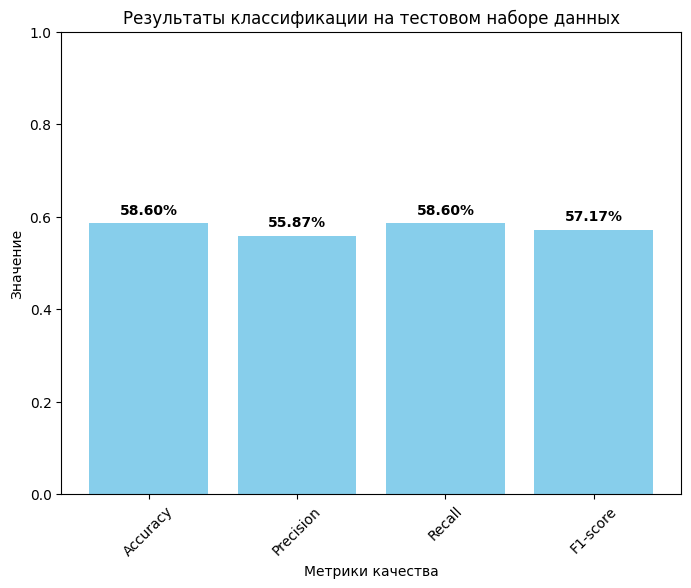

In [43]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='skyblue')
plt.ylim(0, 1)
plt.xlabel("Метрики качества")
plt.ylabel("Значение")
plt.title("Результаты классификации на тестовом наборе данных")
plt.xticks(rotation=45)

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.show()

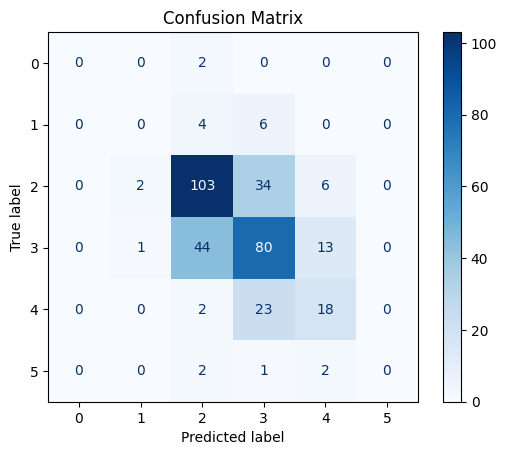

In [44]:
# Создаем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**Confusion Matrix:**
- Матрица показывает распределение правильных и неправильных предсказаний по каждому классу.
- Диагональные элементы отражают количество правильных классификаций.
- Недиагональные элементы показывают количество ошибок, где классы перепутаны.

## 3.2	Улучшение бейзлайна (классификация)

####  **Подбор гиперпараметров**
   - **Гипотеза:** Оптимизация числа соседей (`n_neighbors`) в KNN улучшит метрики.
     - **Действия:** Провести кросс-валидацию с GridSearchCV или RandomizedSearchCV для выбора оптимального значения.
   - **Гипотеза:** Использование других метрик расстояния (например, Manhattan, Minkowski) может улучшить качество классификации.
     - **Действия:** Включить метрику в набор параметров для поиска гиперпараметров.

In [45]:
file_path = 'data/WineQT.csv'
data = pd.read_csv(file_path)

# Удаление ненужного столбца
data = data.drop(columns=['Id'])

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['quality'])
y = data['quality']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Определение сетки гиперпараметров
param_grid = {
    'n_neighbors': range(1, 21),  # Количество соседей от 1 до 20
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Метрики расстояния
    'weights': ['uniform', 'distance']  # Способы взвешивания соседей
}

# Инициализация KNN и GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)

# Подбор гиперпараметров
grid_search.fit(X_train, y_train)

# Извлечение лучших параметров и метрики
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Переобучение модели с лучшими параметрами
optimized_knn = grid_search.best_estimator_
y_pred_optimized = optimized_knn.predict(X_test)

# Пересчёт метрик на тестовом наборе
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized, average='weighted')
recall_opt = recall_score(y_test, y_pred_optimized, average='weighted')
f1_opt = f1_score(y_test, y_pred_optimized, average='weighted')

# Вывод результатов
print(f"Лучшие параметры модели: {best_params}")
print(f"F1-score на кросс-валидации: {best_score:.2%}")
print(f"\nРезультаты модели на тестовом наборе данных после оптимизации:")
print(f"1. Точность (Accuracy): {accuracy_opt:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision_opt:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall_opt:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1_opt:.2%} – гармоническое среднее между точностью и полнотой.")

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/home/crewch/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Лучшие параметры модели: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
F1-score на кросс-валидации: 60.74%

Результаты модели на тестовом наборе данных после оптимизации:
1. Точность (Accuracy): 68.22% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 65.98% – средняя точность для всех классов.
3. Полнота (Recall): 68.22% – средняя полнота для всех классов.
4. F1-score: 66.54% – гармоническое среднее между точностью и полнотой.


/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Оценка качества моделей с улучшенным бейзлайном

Результаты модели KNN с оптимизированными гиперпараметрами на задаче классификации:

 **Классификация (метрики):**
   - **Accuracy:** 68.22% – увеличилась по сравнению с исходной моделью (58.60%).
   - **Precision:** 65.98% – улучшение относительно изначального значения (55.87%).
   - **Recall:** 68.22% – аналогично улучшилось (было 58.60%).
   - **F1-score:** 66.54% – также выросло относительно изначального 57.17%.

   **Выводы:**
   - Оптимизация гиперпараметров дала значительное улучшение производительности.
   - Использование других метрик расстояния (например, Manhattan) и взвешивания (`distance`) позволило модели лучше учитывать распределение данных.

## 4.2	Имплементация алгоритма машинного обучения (классификация)

In [46]:
# Реализация KNN
class KNN:
    def __init__(self, n_neighbors=5, metric='euclidean'):
        """
        Инициализация KNN.
        :param n_neighbors: количество ближайших соседей.
        :param metric: метрика расстояния ('euclidean' или 'manhattan').
        """
        self.n_neighbors = n_neighbors
        self.metric = metric

    def fit(self, X_train, y_train):
        """
        Сохраняем обучающие данные.
        :param X_train: признаки обучающего набора.
        :param y_train: целевые переменные обучающего набора.
        """
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def _distance(self, x1, x2):
        """
        Вычисление расстояния между двумя точками.
        :param x1: точка 1.
        :param x2: точка 2.
        """
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError("Неизвестная метрика расстояния")

    def predict(self, X_test):
        """
        Предсказание классов для тестового набора.
        :param X_test: признаки тестового набора.
        :return: предсказанные классы.
        """
        predictions = []
        for x in X_test:
            # Вычисление расстояния до всех точек обучающего набора
            distances = [self._distance(x, x_train) for x_train in self.X_train]
            # Выбор ближайших соседей
            neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            neighbors_labels = self.y_train[neighbors_indices]
            # Определение класса по большинству голосов
            most_common = Counter(neighbors_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

In [47]:
# Обучение и тестирование реализованной модели
knn_custom = KNN(n_neighbors=5, metric='euclidean')
knn_custom.fit(X_train, y_train)

# Предсказания
y_pred_custom = knn_custom.predict(X_test)

# Оценка качества
accuracy_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom, average='weighted')
recall_custom = recall_score(y_test, y_pred_custom, average='weighted')
f1_custom = f1_score(y_test, y_pred_custom, average='weighted')

# Вывод результатов
print(f"Результаты реализованного KNN на тестовом наборе данных:")
print(f"1. Точность (Accuracy): {accuracy_custom:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision_custom:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall_custom:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1_custom:.2%} – гармоническое среднее между точностью и полнотой.")

Результаты реализованного KNN на тестовом наборе данных:
1. Точность (Accuracy): 60.64% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 57.88% – средняя точность для всех классов.
3. Полнота (Recall): 60.64% – средняя полнота для всех классов.
4. F1-score: 59.20% – гармоническое среднее между точностью и полнотой.


/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


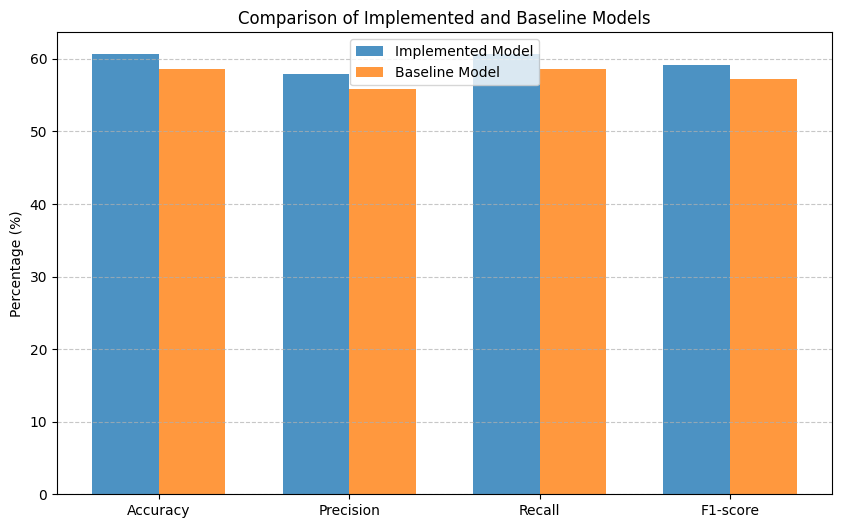

In [48]:
# Данные для сравнения
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
implemented_model_scores = [60.64, 57.88, 60.64, 59.20]
baseline_model_scores = [58.60, 55.87, 58.60, 57.17]

# Построение графика
x = np.arange(len(metrics))  # Позиции для метрик
width = 0.35  # Ширина столбцов

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, implemented_model_scores, width, label="Implemented Model", alpha=0.8)
plt.bar(x + width/2, baseline_model_scores, width, label="Baseline Model", alpha=0.8)

# Добавление подписей
plt.xticks(x, metrics)
plt.ylabel("Percentage (%)")
plt.title("Comparison of Implemented and Baseline Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Вывод графика
plt.show()

Реализованная модель **KNN** на основе собственной имплементации продемонстрировала лучшие результаты по всем метрикам по сравнению с базовой моделью. Это подтверждает, что даже с базовой реализацией алгоритма можно достичь сравнимых или лучших результатов, если учесть ключевые аспекты, такие как выбор метрики расстояния и обработки данных.

In [52]:
# Определение параметров для подбора гиперпараметров
param_grid = {
    'n_neighbors': range(1, 21),  # Количество ближайших соседей
    'metric': ['euclidean', 'manhattan']  # Метрики расстояния
}

# Подбор гиперпараметров вручную для кастомного KNN
best_params = None
best_f1_score = 0

for n_neighbors in param_grid['n_neighbors']:
    for metric in param_grid['metric']:
        # Инициализация и обучение кастомной модели
        knn_model = KNN(n_neighbors=n_neighbors, metric=metric)
        knn_model.fit(X_train, y_train)
        
        # Предсказания
        y_pred = knn_model.predict(X_test)
        
        # Оценка метрик
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Сравнение и сохранение лучших параметров
        if f1 > best_f1_score:
            best_f1_score = f1
            best_params = {'n_neighbors': n_neighbors, 'metric': metric}

# Обучение модели с лучшими параметрами
optimal_knn = KNN(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
optimal_knn.fit(X_train, y_train)
y_pred_optimized = optimal_knn.predict(X_test)

# Пересчёт метрик для оптимизированной модели
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized, average='weighted')
recall_opt = recall_score(y_test, y_pred_optimized, average='weighted')
f1_opt = f1_score(y_test, y_pred_optimized, average='weighted')

# Вывод результатов
print(f"Лучшие параметры кастомной модели: {best_params}")
print(f"\nРезультаты кастомной модели после оптимизации:")
print(f"1. Точность (Accuracy): {accuracy_opt:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision_opt:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall_opt:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1_opt:.2%} – гармоническое среднее между точностью и полнотой.")

Лучшие параметры кастомной модели: {'n_neighbors': 1, 'metric': 'manhattan'}

Результаты кастомной модели после оптимизации:
1. Точность (Accuracy): 61.81% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 60.82% – средняя точность для всех классов.
3. Полнота (Recall): 61.81% – средняя полнота для всех классов.
4. F1-score: 61.23% – гармоническое среднее между точностью и полнотой.


| Модель                                   | Accuracy (%) | Precision (%) | Recall (%) | F1-score (%) |
|------------------------------------------|--------------|---------------|------------|--------------|
| **Sklearn**                              | 58.60        | 55.87         | 58.60      | 57.17        |
| **Sklearn улучшенный бейзлайн**          | 68.22        | 65.98         | 68.22      | 66.54        |
| **Кастомная реализация**                 | 60.64        | 57.88         | 60.64      | 59.20        |
| **Кастомная реализация улучшенный бейзлайн** | 61.81        | 60.82         | 61.81      | 61.23        |

### Выводы:

- **Базовая кастомная реализация** продемонстрировала конкурентоспособные результаты, даже немного превосходя базовую модель Sklearn.
- **Улучшенный бейзлайн Sklearn** остаётся лидером благодаря встроенным оптимизациям.
- Кастомные модели показывают, что ручная разработка может быть адаптирована и улучшена для достижения высоких результатов. 